In [3]:
#https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


#libraries
# Importad las librerías necesarias aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets

from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
                             silhouette_score, davies_bouldin_score,silhouette_samples)
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import sklearn.preprocessing as skp #machine learning (preprocessing)
import sklearn.cluster as skc #machine learning (clustering)

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


Attributes

People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* (0/1)Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion

* NumDealsPurchases: Number of purchases made with a discount
* (0/1)AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* (0/1)AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* (0/1)AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* (0/1)AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* (0/1)AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* (0/1)Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month*

# Preprocessing

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/jorgecalvar/project-client-segmentation/main/marketing_campaign.csv',header=0,sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
print(len(numerical_features) , numerical_features)
categorical_features = df.select_dtypes(exclude='number').columns.tolist()
print(len(categorical_features) , categorical_features)

df_num=df.select_dtypes(include='number')
df_cat=df.select_dtypes(exclude='number')

26 ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
3 ['Education', 'Marital_Status', 'Dt_Customer']


### Categorical variables

As we observe there are only 3 non numerical variables

2 are categorical: Education and Marital_status

Dt_Customer is a date which we will treat later

In [6]:
df[categorical_features].describe(include=object).T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


In [7]:
print(df.Marital_Status.value_counts())
print(df.Education.value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


### Numerical Variables

In [8]:
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [9]:
above_0_missing = df.isnull().sum() > 0
percentage = df.isnull().sum()/df.isnull().count() 
pd.concat([df.isnull().sum()[above_0_missing], percentage[above_0_missing]], axis=1, keys=['Total', 'Percentage'])

,Total,Percentage
Income,24,0.010714


 24 values missing in the Income variable which is 1%.

 To treat them we will substitute for the mean

In [10]:
df['Income']=df['Income'].fillna(df['Income'].mean())

In [11]:
corr = df_num.corr()
corr.style.background_gradient(cmap='coolwarm')

/opt/python/envs/default/lib/python3.8/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/python/envs/default/lib/python3.8/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,nan,nan,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,nan,nan,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,nan,nan,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,nan,nan,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,nan,nan,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,nan,nan,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,nan,nan,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,nan,nan,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,nan,nan,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,nan,nan,0.111331


In [12]:
print(df_num.Z_CostContact.value_counts())
print(df_num.Z_Revenue.value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


We observe two variables which are the same for every row so we can eliminate them

In [13]:
df = df.drop('Z_CostContact', axis=1)
df = df.drop('Z_Revenue', axis=1)

In [14]:
df.nunique()

### More variable preprocessing

#### Offer campaigns, binary variables

We se here, and also by reading the info on the dataset, that there are many binary variables 0/1

(0/1)Complain: 1 if the customer complained in the last 2 years, 0 otherwise

(0/1)AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

(0/1)AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

(0/1)AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

(0/1)AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

(0/1)AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

(0/1)Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

In [15]:
df['SumAcceptedCmp'] =  df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] +df['AcceptedCmp5'] +df['Response']
print(df.SumAcceptedCmp.value_counts())

0    1631
1     370
2     142
3      51
4      36
5      10
Name: SumAcceptedCmp, dtype: int64


In [16]:
px.histogram(df, x="SumAcceptedCmp", color="SumAcceptedCmp", title=" Sum of offers accepted by customer")

We wanted to check whether customers could accept multiple offers, we see that they can.
We see accepting more offers is less likely

#### Date visualization

In [17]:
type(df.Dt_Customer[1])

str

In [18]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


In [19]:
#new feature
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta.days)

df["days"] = days

In [119]:
fig = make_subplots(rows = 1,
                    cols = 2,
                    subplot_titles=("Dates distribution", "days since enrolment"))


# primer gráfico: Histograma de valores de las notas de writing
fig.add_trace(
    go.Histogram(
        x = df["Dt_Customer"],

        showlegend = False
    ),
    row = 1,
    col = 1
)

fig.add_trace(
    go.Histogram(
        x = df["days"], 
        showlegend = False,
        xbins=dict(
            start= 0,
            end= 1100,
            size=27
        ),        
    ),
    row = 1,
    col = 2
)


# Modifico las dimensiones totales y el titulo global
fig.update_layout(bargap = 0.1)

fig.show()

In terms of enrollment we se how most people enrolled after summer 2012 and until summer 2014. This means in terms of days of enrollment that most people about 200-800 days. Uf we look closely we see how both distributions are the same but reflected, since date of enrollment is the inverse of days since enrollment.

#### Age Visualization

In [22]:
df["Age"] = 2014-df.Year_Birth

In [124]:
fig = make_subplots(rows = 1,
                    cols = 2,
                    subplot_titles=("Year of birth distribution", "Age distribution"))


# primer gráfico: Histograma de valores de las notas de writing
fig.add_trace(
    go.Histogram(
        x = df["Year_Birth"],

        showlegend = False
    ),
    row = 1,
    col = 1
)

fig.add_trace(
    go.Histogram(
        x = df["Age"], 
        showlegend = False,
        
    ),
    row = 1,
    col = 2
)


# Modifico las dimensiones totales y el titulo global
fig.update_layout(bargap = 0.1)

fig.show()

Most people are between 36 and 50 years old.
Again, distributions mirror each other since the age is inverse to the year of birth. We see some anomalies of people being over 115 years old but are limited and don't go too far into the impossible.

In [25]:
column_to_move= df.pop("Education")
df.insert(1, "Education",column_to_move)
column_to_move= df.pop("Marital_Status")
df.insert(2, "Marital_Status",column_to_move)

column_to_move=df.pop("Dt_Customer")
df.insert(3, "Dt_Customer", column_to_move)
column_to_move=df.pop("days")
df.insert(df.columns.get_loc("Dt_Customer")+1, "days", column_to_move)
column_to_move= df.pop("Age")
df.insert(df.columns.get_loc("Year_Birth")+1, "Age",column_to_move)

In [ ]:
df['Relationship'] = df['Marital_Status']
df['Relationship'] = df['Relationship'].replace(['Married', 'Together'],'Relationship')
df['Relationship'] = df['Relationship'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')
column_to_move=df.pop("Relationship")
df.insert(df.columns.get_loc("Marital_Status")+1, "Relationship", column_to_move)

df['GradorPost'] = df['Education']
df['GradorPost'] = df['GradorPost'].replace(['Graduation', 'Basic'],'Undergrad Degree')
df['GradorPost'] = df['GradorPost'].replace(['PhD', 'Master', '2n Cycle'],'PostGrad Degree')
column_to_move=df.pop("GradorPost")
df.insert(df.columns.get_loc("Education")+1, "GradorPost", column_to_move)

## Exploration 

In [125]:
df.head(3)

,ID,Education,Marital_Status,Dt_Customer,days,Year_Birth,Age,Income,Kidhome,Teenhome,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,SumAcceptedCmp
0,5524,Graduation,Single,2012-04-09,971,1957,57,58138.0,0,0,...,4,7,0,0,0,0,0,0,1,1
1,2174,Graduation,Single,2014-08-03,125,1954,60,46344.0,1,1,...,2,5,0,0,0,0,0,0,0,0
2,4141,Graduation,Together,2013-08-21,472,1965,49,71613.0,0,0,...,10,4,0,0,0,0,0,0,0,0


### Overview

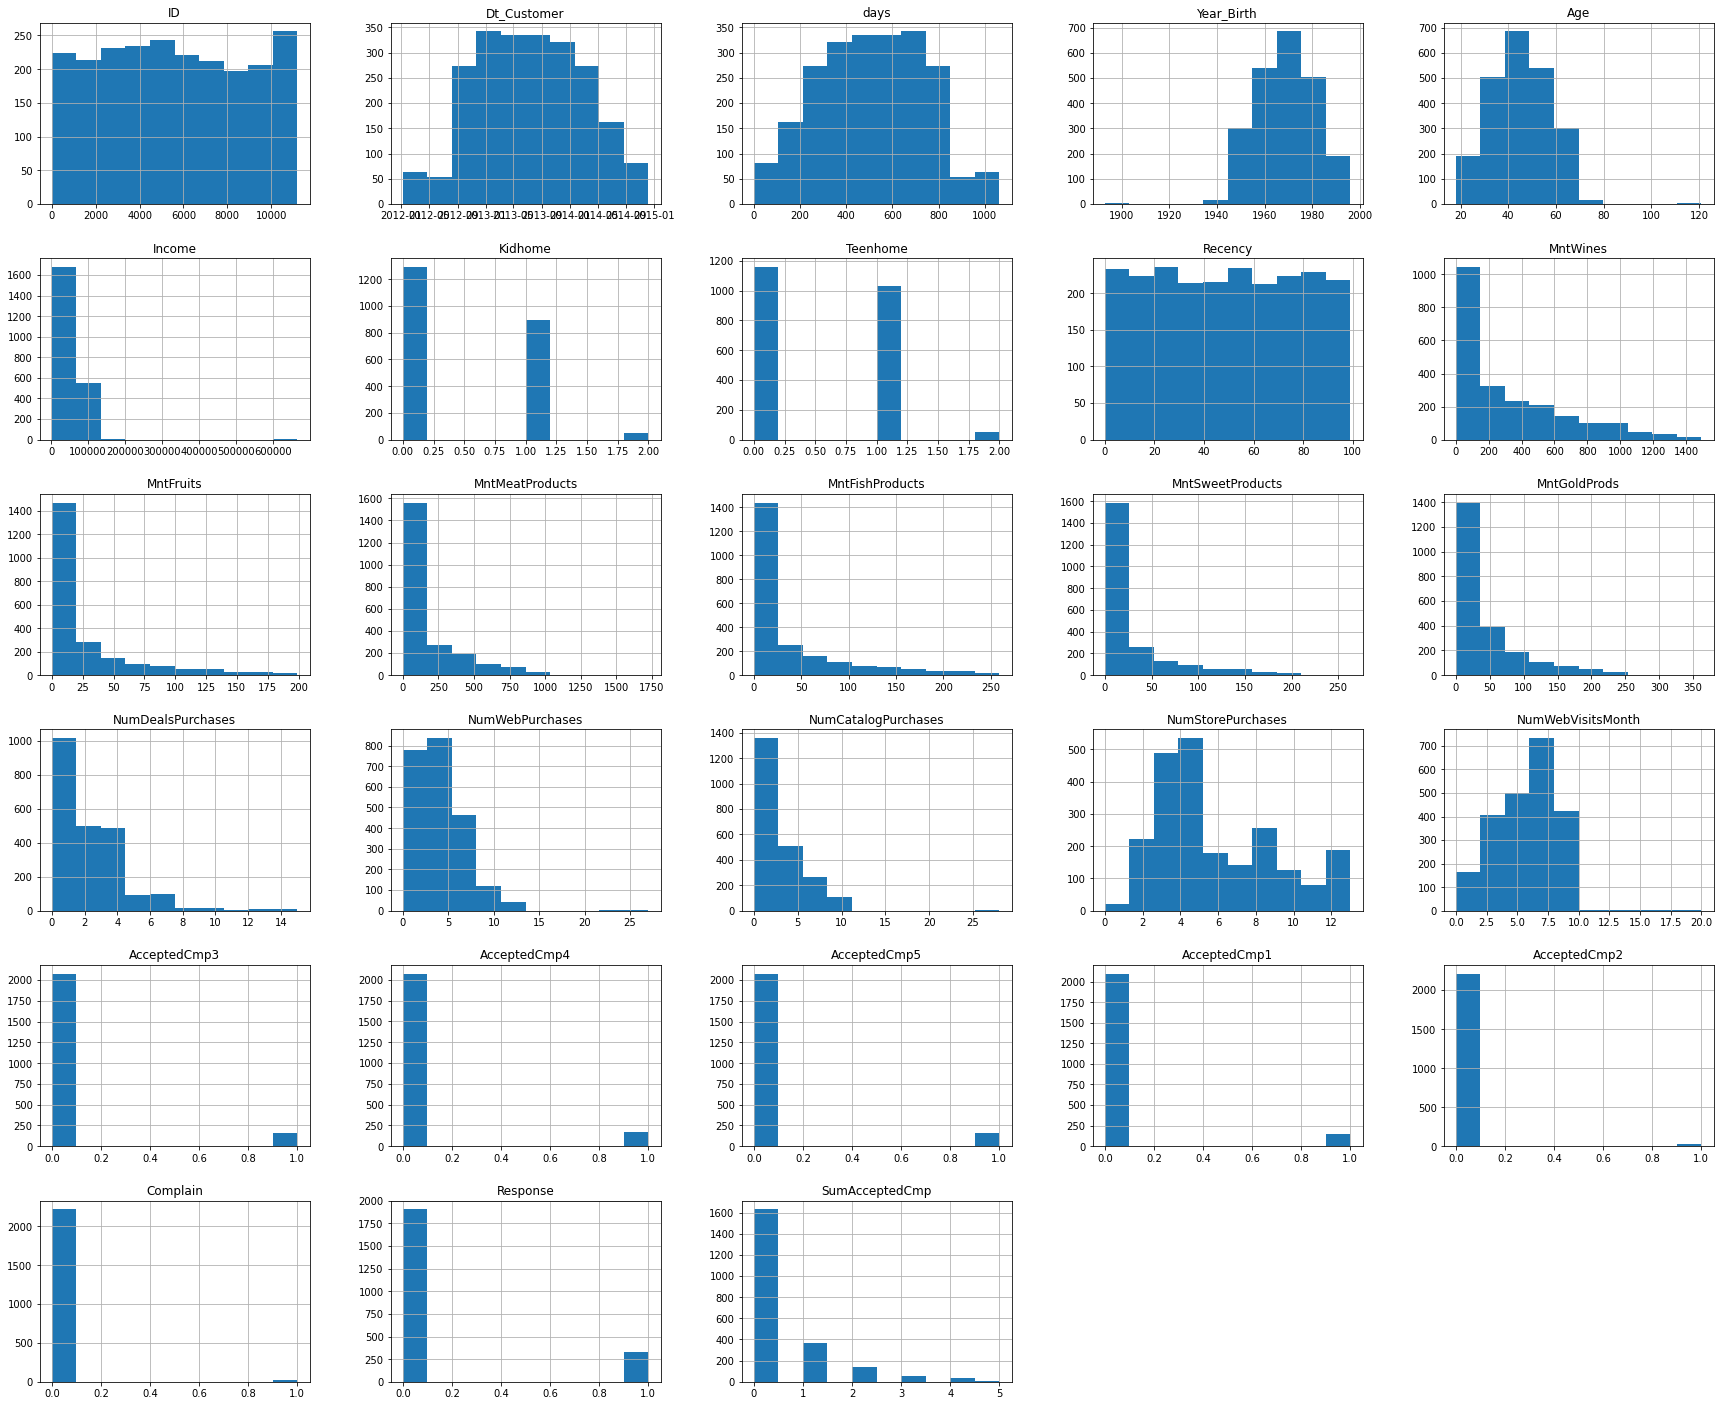

In [64]:
pd.options.plotting.backend = "matplotlib"
df.loc[:, df.columns].hist(figsize=(30, 25))

In [210]:
dfhist=df.iloc[:, 6:-1].loc[:, df.iloc[:, 6:-1].columns != 'Year_Bipd.size(rth'] 
dfhist.shape

(2240, 25)

#### All variable distributions: histograms

In [218]:
df.Income[df.Income > 115000] = 115000

In [219]:
features = [x for x in dfhist.columns]

fig = make_subplots(rows = 5, cols = 5, subplot_titles = (features))

#Preparo la estructura de filas y columnas para asignar
rows = np.repeat([1,2,3,4,5], 5)
cols = [1,2,3,4,5]*5

# Creo secuencialmente la figura con un loop
for feature, row, col in zip(features,rows,cols):
    if feature == features[-1]:
        showlegend = True
    else:
        showlegend = False
        
    fig.add_trace(
        go.Histogram(
            x = df[feature],
            xbins=dict(
                start=df[feature].min()-1,
                end=df[feature].max()+1,
                size=(df[feature].max() - df[feature].min())/30
            ),
        name = feature,showlegend = False
        ),
        row = row,
        col = col
    )
    
fig.update_layout(title = "Histograms ",bargap=0.1,barmode = "overlay",
                  height = 1300, width = 1000)

fig.show()

From this visuzalization we can see at a glance all the distributions in numerical variables.

#### Categorical visualizations

In [202]:
fig = make_subplots(rows = 2,
                    cols = 2,
                    specs=[[{"type": "histogram"},{"type": "pie"}],[{"type": "histogram"},{"type": "pie"}]],
                    subplot_titles=("Marital Status distribution", "Relationship", "Education distribution", "Grad or Postgrad"))


fig.add_trace(
    go.Histogram(
        x = df.Marital_Status,
        showlegend = False,
    ),
    row = 1,
    col = 1
)

fig.add_trace(
    go.Pie(
        labels=df.Relationship.value_counts().index.tolist(), 
        values=df.Relationship.value_counts().tolist(),
    ),
    row = 1,
    col = 2
)
fig.add_trace(
    go.Histogram(
        x = df.Education,
        showlegend = False,
    ),
    row = 2,
    col = 1
)

fig.add_trace(
    go.Pie(
        labels=df.GradorPost.value_counts().index.tolist(), 
        values=df.GradorPost.value_counts().tolist(),
     
    ),
    row = 2,
    col = 2
)


# Modifico las dimensiones totales y el titulo global
fig.update_layout(bargap = 0.1)

fig.show()

In [191]:
print(df.GradorPost.value_counts().index.tolist())
print(df.GradorPost.value_counts().tolist())

['Undergrad Degree', 'PostGrad Degree']
[1181, 1059]


Since there where too many categories and some meant very similar things, specially in the marital status variable, we decided to simplify these variables to understand better the distribution of people.

In [161]:
px.histogram(df, x="Education", color="Marital_Status", title="Education vs Marital Status all categories")

The different proportions are unclear, lets go with an easier graph.

On the graph below we see no difference with proportions of single people and those in a relationship being practically the same in both education groups.

In [164]:
px.histogram(df, x="GradorPost", color="Relationship", title="Relationship vs Grad or Postgrad degree")

No difference

#### All variable correlation: heatmap

In [152]:
# Una versión con Plotly
corr = df.iloc[:, 6:-1].corr()

z = round(corr,2).values
for i in range(z.shape[0]):
    if i == (z.shape[0] - i - 1):
        break
    z[[i,(z.shape[0]-i-1)],:] = z[[(z.shape[0]-i-1),i],:]

x = [x for x in df.iloc[:, 6:-1].columns]
y = [x for x in df.iloc[:, 6:-1].columns ]
y.reverse()

z_text = [[str(y) for y in x] for x in z]

heatmap = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='icefire', showscale=True )

heatmap.show()

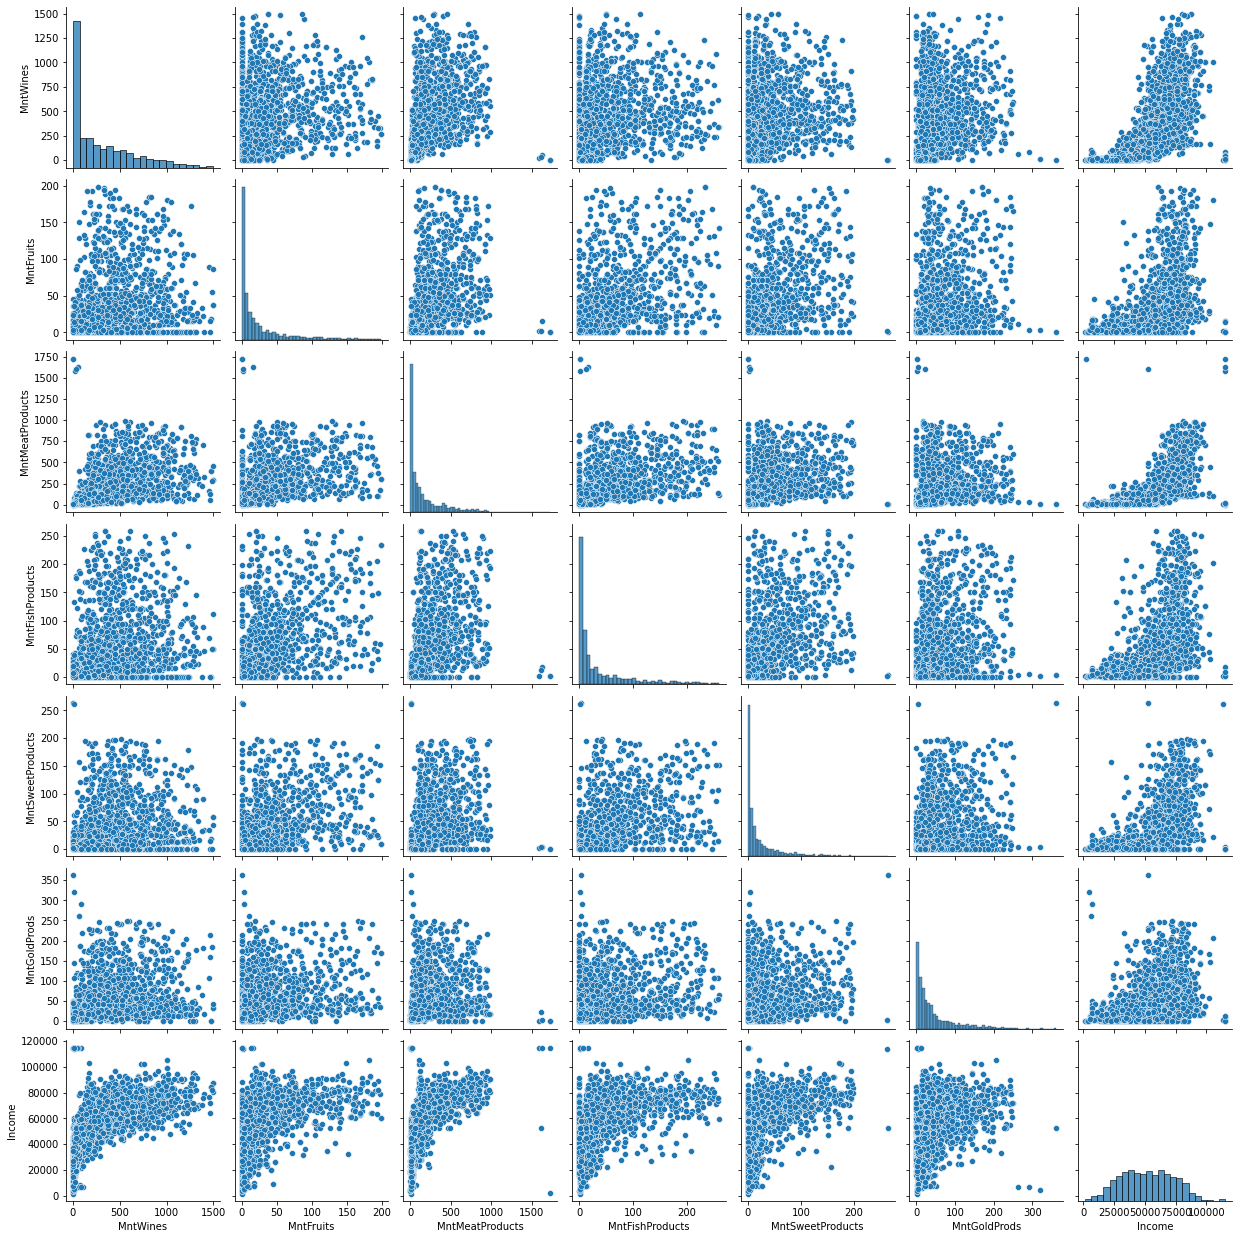

In [220]:
dfMnt=df.iloc[:, 13:19]
dfMnt['Income']=df.Income
sns.pairplot(dfMnt)

In [4]:
dfMntSum=pd.DataFrame(df.iloc[:, 13:19].sum(axis=0))
dfMntSum['Mnt'] = dfMntSum.index
dfMntSum.columns['Total Amount spent','Category of products']
dfMntSum
px.bar(dfMntSum, x='Category of products', y='Total Amount spent')
    

NameError: NameError: name 'df' is not defined